Jonah Librande

Lab 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as pp

def chadMe(simp, signal):
    chad = np.zeros(simp.size)
    for i in range(chad.size):
        if i < numale.size:
            chad[i] = np.add(simp[i], numale[i])
        else:
            chad[i] = simp[i]
    return chad

# Problem 1

We know how to find a 5-sigma threshhold. We define the probability of an event to be the likelihood that the assumed background (which is in this case the Poisson of mean 100) generates an event as or more signal like, and we define events of larger measurement values to be more signal like -- if we count more particles in a given event, we think of that as being more remarkable than less. We then have that the 5-sigma threshhold will be the event value with a probability equal the probability of finding a value further than 5 sigma to the right of the mean in a normal distribution, which is the area under the tail of the normal to the right of the 5 sigma value, assuming the distribution to be normalized. We calculate this below:

In [2]:
sig = pp.norm.cdf(5)
print('We find a threshhold value of {} events.'.format(str(pp.poisson.ppf(sig, 100))))

We find a threshhold value of 154.0 events.


# Problem 2a and 2b

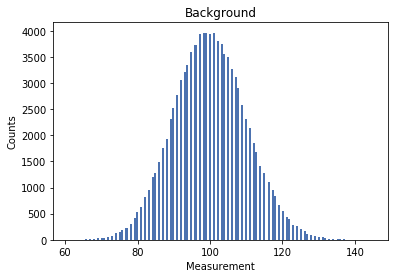

In [33]:
simp = pp.poisson.rvs(100, size=100000)
plt.hist(simp, bins=150)
plt.title('Background')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.show()

Now, we generate a signal. The signal will also be a counting of particle events, which is inherently discrete, and then must be Poisson distributed. The machine epsilon of my computer is garbage, such that it cannot even calculate what the 10 sigma threshhold value is -- it rounds off somewhere and tells me it is infinity. So, due to hardware limitations, I just choose a value of 250 for the mean of the Poisson-distributed signal, which is definitely over the 10 sigma threshhold. To inject it in to the background, we sample the signal, and then impose the sampled events over events from the background. I show the sample from the background with the sample from the signal so that the change in the next step is more dramatic.

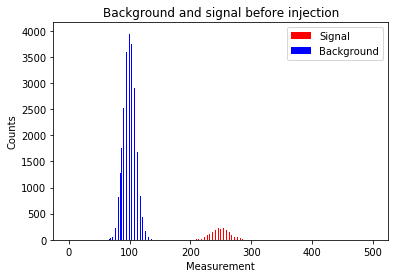

In [47]:
plt.cla()
signal = 250
n = 8526
numale = pp.poisson.rvs(signal, size=n)
plt.hist([numale, simp], bins = np.linspace(0, 500, 499), color=['r', 'b'], label=['Signal', 'Background'])
# x = np.linspace(200, 300)
# plt.plot(x, pp.poisson.pmf(x, mu=250), 'p', label='Signal distribution')
plt.title('Background and signal before injection')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.legend()
plt.show()

We observe what we expect: the signal follows a Poisson distribution of mean 250. It has not overlap with the background, that is, there appear to be no measurement values common to both the background and the signal. When we inject, the strange behavior is that the qualitative features of the graph remain the same, but the mean of the blob we recognize as the signal moves!

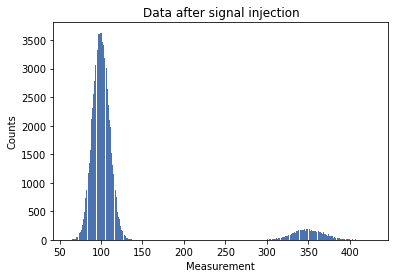

In [42]:
plt.cla()
# Inject the signal
chad = chadMe(simp, numale)
plt.hist(chad, bins = 400)
plt.title('Data after signal injection')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.show()

The mean has moved from 250 to 350. The distance it has moved to the right, 100, is exactly the mean of the background distribution, and this is no coincidence. On average, the background produces 100 particle events, so if on average the signal, independent of the background, produces 250 particle events, then of course since both events are happening at the same time, the overall number of observed particles in an average signal event, when we take the background into account, will be the sum of the particles from the background plus the particles from the signal, which on average is going to be 250 + 100 = 350. So it makes perfect sense that the mean moved 100 units to the right for the signal. It retained its shape as a Poisson distribution because the sum of Poisson distributions is a Poisson distribution, naturally. The net effect of all of this is that the observed measurement is not a measurement of the signal, but a measurement of the signal plus background, so that the overall measurement is greater than a measurement of just the background.

# Problem 3a

We seek to construct a historgram as in the previous part for a wide range of signal strengths, and by signal strength, we refer to the sigma of the mean of the signal, with a larger sigma corresponding to a stronger signal. For each given mean, we simulate a signal of the given mean, sample from the background and the signal, and then add them together, which simulates the events we would see in the simulated situation of the distribution being the background plus the signal. This is what we seek to simulate: the distribution of the background plus the signal, for a range of signal strengths.

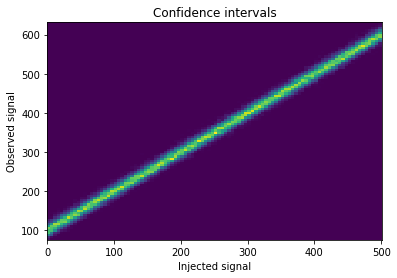

In [13]:
plt.cla()

sz = 50000
gammas = np.linspace(0, 501, sz)
betas = pp.poisson.rvs(100, size=sz)

alphas = np.add(betas, gammas)
    
plt.hist2d(gammas, alphas, sz / 500)
plt.xlabel('Injected signal')
plt.ylabel('Observed signal')
plt.title('Confidence intervals')
plt.show()

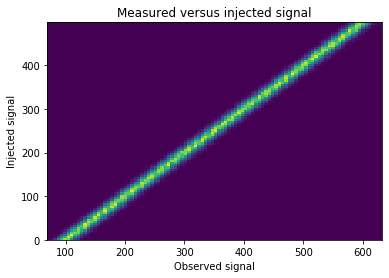

In [31]:
n = 100
inj = np.array([])
obs = np.array([])

sigs = range(500)
for i in sigs:
    beta = pp.poisson.rvs(100, size=n * 2)
    for j in beta:
        inj = np.append(inj, i)
        obs = np.append(obs, j + i)

plt.hist2d(obs, inj, bins = n)
plt.title('Measured versus injected signal')
plt.xlabel('Observed signal')
plt.ylabel('Injected signal')
plt.show()

# Problem 3b

To check that this agrees with the previous result, we just sample from the background some sizeable number of times, and then add to each sampled value the mean of the signal we had in the previous part, 250. We see:

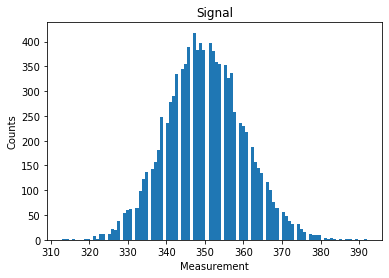

In [30]:
a = pp.poisson.rvs(100, size = 10000)
b = np.array([])
sign = 250
for i in a:
    b = np.append(b, i + sign)
    
plt.hist(b, bins = 100)
plt.title('Signal')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.show()

The above is a Poisson distributed signal centered at 350, which is exactly what we had before.

# Problem 3c

We now want to deduce from the observed signal what the original injected signal was. This is straightforwards: once we know that the observed and injected signals only differ by some affine offset of the background mean from one another, we can just sample from some total count distribution, and then subtract off the background mean to get the approximate signal distribution. We choose a value of a total observed count mean of, say, 300, and then graph what the resultant signal looks like, after we subtract off the background.

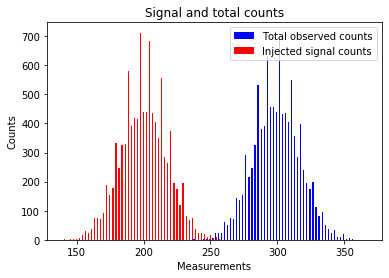

In [50]:
totMean = 300
bgMean = 100
sam = pp.poisson.rvs(totMean, size=10000)
pl = np.array([])
for i in sam:
    pl = np.append(pl, i - bgMean)
    
plt.hist([sam, pl], bins = 100, color=['b', 'r'], label=['Total observed counts', 'Injected signal counts'])
plt.title('Signal and total counts')
plt.xlabel('Measurements')
plt.ylabel('Counts')
plt.legend()
plt.show()

As noted before, the injected counts are the counts we would see if the background were not there -- these are the counts attributable to the signal alone, without the background.

# Problem 3d and 3e

Given this distribution of data counts, we can normalize it to obtain a probability distribution. We then may integrate it symmetrically out from its center of 200, stopping once we hit a probability of 1 sigma. Do so:

In [56]:
s1 = pp.norm.cdf(1)
N = np.sum(pl)
print(N, pl, np.sum(pl / N))
r = 1
p = 0
while p < s1:
    p = 0
    for i in pl:
        if (i <= r + 200) and (i >= -r + 200):
            p += (i / N)
    r += 1
print(p, s1)
print('We integrated up to a distance of {} units from the mean.'.format(r))

1999274.0 [203. 224. 208. ... 190. 200. 174.] 1.0
0.8454839106595708 0.8413447460685429
We integrated up to a distance of 25 units from the mean.


I claim this range we integrated over gives the range of our 1 sigma uncertainty in the signal strength. To see this, observe that our sample is large enough to be practically representative of the true signal; the probability that the true signal give a data point outside of our range is practically zero. This is the assumption made when we normalize our data and claim it to be a distribution. Next, this means we are assuming the true signal mean will lie somewhere among these values. Then, the fraction of all values of the distribution contained within some range ought to give the probability that the true mean lies in the range. So, we integrate on the distribution until we hit a 1 sigma probability to get a range that we are 1 sigma certain will contain the true mean. Note we made the assumption (to ease calculations) that the true distribution is approximately symmetric in this case, which we know to be true here, as we are dealing with Poisson distributions. This allowed us to integrate symmetrically outwards on the distribution from the mean. We also were able to deduce the mean of this particular signal exactly from previous parts, but in general, we would need to calculate the exact mean. Integrating out from the mean may also not be symmetric in all cases, but as there is a possibility the true signal strength lies above or below the mean here, and we know the signal to be symmetric here, then we can integrate symmetrically outwards from our known mean.

# Problem 4a